# Senior Project: AI vs Human Text

TO DO: Senior Project
---------------------------------------------------------------------------------

-- Compile Human Essays
	** How many essays? On what?
	** Emails, Letters, Paragraphs?
-- Compile AI Essays
	**Chatgpt, Ask for friends AI essays, Online?

-- Add MetaData For Sorting Ease
	** What else can make essays distinct for analysis?
	** Subject, Topic, Theme, Type?

-- Normalize, Tokenize Essays

-- Analitics? Insightful vs. Junk Words, Frequencies, Similarities and Differences.. Structure?

-- Visualization of Data
	**Graphs of frequency, pie-charts, junk? SHOW ALL DATA POINTS
	** Ask Sponsor?


--------------MORE??-------------


-- AI Model
	** RESEARCH WHAT MODEL IS BEST 
-- Create Interface to interact with AI
	** Input Text, Return whether AI or Human
-- Train, Tweak, Refine

-- Catelog Research/Findings
	** Process, Shortcomings, Successes, Does it Work?
	** Keep Track of Libraries, Types of Text
-- Slide Show
-- Presentation


---------------DONE??-------------

## Data Collection

### Currently using my old writing assignments and some random essays. 

## Data Preprocessing

!pip install python-docx

In [11]:
from docx import Document
import nltk
import os
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

# Textual metadata calculation functions
def get_word_count(text):
    return len(text.split())

def get_sentence_count(text):
    sentences = re.split(r'[.!?]+', text)
    return len([s for s in sentences if s.strip()])

def get_avg_word_length(text):
    words = text.split()
    if words:
        return sum(len(word) for word in words) / len(words)
    else:
        return 0

def get_paragraph_count(text):
    paragraphs = text.split('\n\n')  # Assuming paragraphs are separated by double newlines
    return len([p for p in paragraphs if p.strip()])

def get_lexical_diversity(text):
    words = text.split()
    unique_words = set(words)
    if words:
        return len(unique_words) / len(words)
    else:
        return 0

def remove_after_works_cited(text):
    lower_text = text.lower()
    reference_headings = ["works cited", "references", "bibliography", "reference list"]
    
    for heading in reference_headings:
        index = lower_text.find(heading)
        if index != -1:
            return text[:index]

    return text

def get_comma_count(text):
    return text.count(',')

def get_adjective_count(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    adjectives = [word for word, tag in tagged_tokens if tag.startswith('JJ')]
    return len(adjectives)

def get_semicolon_count(text):
    return text.count(';')

def preprocess_text(text):
    # Remove possessive 's and standalone '
    text = re.sub(r"\b's\b", "", text)  # Remove possessive 's
    text = re.sub(r"'\b|\b'|''", "", text)  # Remove standalone ' and ''
    
    # Convert text to lowercase
    text = text.lower()
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove punctuation and any non-standard special characters
    tokens = [word for word in tokens if word.isalnum()]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return tokens

# Function to process Word documents and extract metadata
def docx_to_text_and_metadata(path, label):
    doc = Document(path)
    full_text = '\n\n'.join(paragraph.text for paragraph in doc.paragraphs if paragraph.text)
    cleaned_text = remove_after_works_cited(full_text)
    
    title = doc.core_properties.title
    subject = doc.core_properties.subject

    comma_count = get_comma_count(cleaned_text)
    adjective_count = get_adjective_count(cleaned_text)
    semicolon_count = get_semicolon_count(cleaned_text)
    word_count = get_word_count(cleaned_text)
    sentence_count = get_sentence_count(cleaned_text)
    avg_word_length = get_avg_word_length(cleaned_text)
    paragraph_count = get_paragraph_count(cleaned_text)
    lexical_diversity = get_lexical_diversity(cleaned_text)
    
    return {
        'text': cleaned_text,
        'title': title,
        'subject': subject,
        'comma_count': comma_count,
        'adjective_count': adjective_count,
        'semicolon_count': semicolon_count,
        'word_count': word_count,
        'sentence_count': sentence_count,
        'avg_word_length': avg_word_length,
        'paragraph_count': paragraph_count,
        'lexical_diversity': lexical_diversity,
        'file_name': os.path.basename(path),
        'label': label
    }

# Function to process a directory of essays
def process_essays_directory(docs_dir, label):
    doc_files = [f for f in os.listdir(docs_dir) if f.endswith('.docx')]
    docs_data = []

    for file_name in doc_files:
        file_path = os.path.join(docs_dir, file_name)
        doc_data = docx_to_text_and_metadata(file_path, label)
        docs_data.append(doc_data)

    return docs_data

# Directories for human-written and AI-generated essays
human_docs_dir = r'C:\Users\Colin\OneDrive\Desktop\Human Essays SP'  # Adjust the path as needed
ai_docs_dir = r'C:\Users\Colin\OneDrive\Desktop\AI Essays SP'  # Adjust the path as needed

# Process each directory with the appropriate label
human_docs_data = process_essays_directory(human_docs_dir, 'Human')
ai_docs_data = process_essays_directory(ai_docs_dir, 'AI')

# Combine the data from both sources
all_docs_data = human_docs_data + ai_docs_data

# Convert to DataFrame and export to CSV
df_all_docs = pd.DataFrame(all_docs_data)
df_all_docs.to_csv('combined_docs_with_metadata.csv', index=False)
print("Document data exported to 'combined_docs_with_metadata.csv'.")

Document data exported to 'combined_docs_with_metadata.csv'.


## Find Directory where .csv File is Stored

In [12]:
import os

current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

Current working directory: C:\Users\Colin


## Retrieve Lexical Statistics

### Before Cleaning Word Count

In [13]:
def raw_word_count(text):
    # Split the text on whitespace (spaces, newlines, tabs) to get words
    words = re.split(r'\s+', text)
    # Filter out empty strings that may result from consecutive whitespace
    words = [word for word in words if word]
    return len(words)

# Initialize counters
ai_raw_word_count = 0
human_raw_word_count = 0

# Loop through each essay and count the words
for index, row in df_all_docs.iterrows():
    word_count = raw_word_count(row['text'])
    if row['label'] == 'AI':
        ai_raw_word_count += word_count
    elif row['label'] == 'Human':
        human_raw_word_count += word_count

# Print the total raw word counts
print(f"Total raw word count for AI essays: {ai_raw_word_count}")
print(f"Total raw word count for Human essays: {human_raw_word_count}")

Total raw word count for AI essays: 6667
Total raw word count for Human essays: 10810


### After Cleaning Word Count

In [14]:
ai_word_count = 0
human_word_count = 0

# Loop through each essay, preprocess, and count the words
for index, row in df_all_docs.iterrows():
    words = preprocess_text(row['text']) 
    if row['label'] == 'AI':
        ai_word_count += len(words)
    elif row['label'] == 'Human':
        human_word_count += len(words)

print(f"Cleaned total word count for AI essays: {ai_word_count}")
print(f"Cleaned total word count for Human essays: {human_word_count}")

Cleaned total word count for AI essays: 3961
Cleaned total word count for Human essays: 5772


## Attempt Visualization of All Most Frequent Words

In [15]:
all_words = []
for essay in df_all_docs['text']:  
    all_words.extend(preprocess_text(essay))

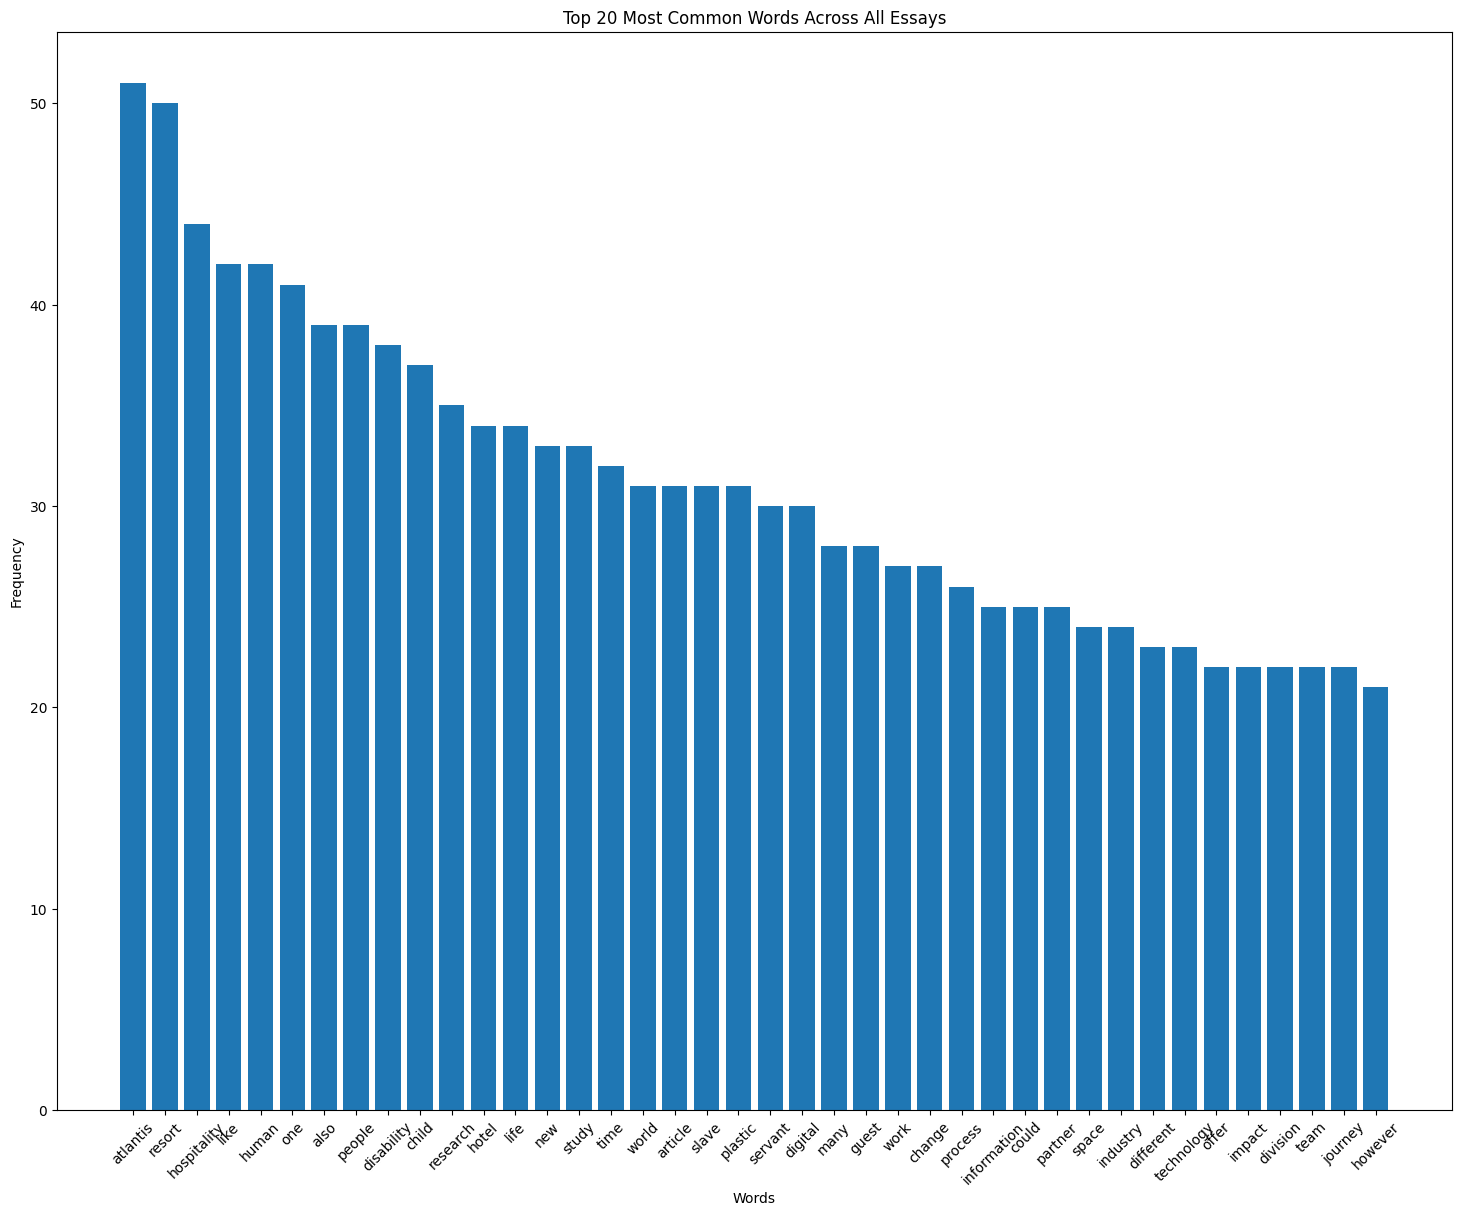

In [16]:
from nltk import FreqDist

# Create a frequency distribution of words
freq_dist = FreqDist(all_words)

# Get the 20 most common words
most_common_words = freq_dist.most_common(40)
words, frequencies = zip(*most_common_words)

# Create a bar chart
plt.figure(figsize=(18, 14))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.title('Top 20 Most Common Words Across All Essays')
plt.show()

## Visualization Popular Word Frequency AI vs. Human

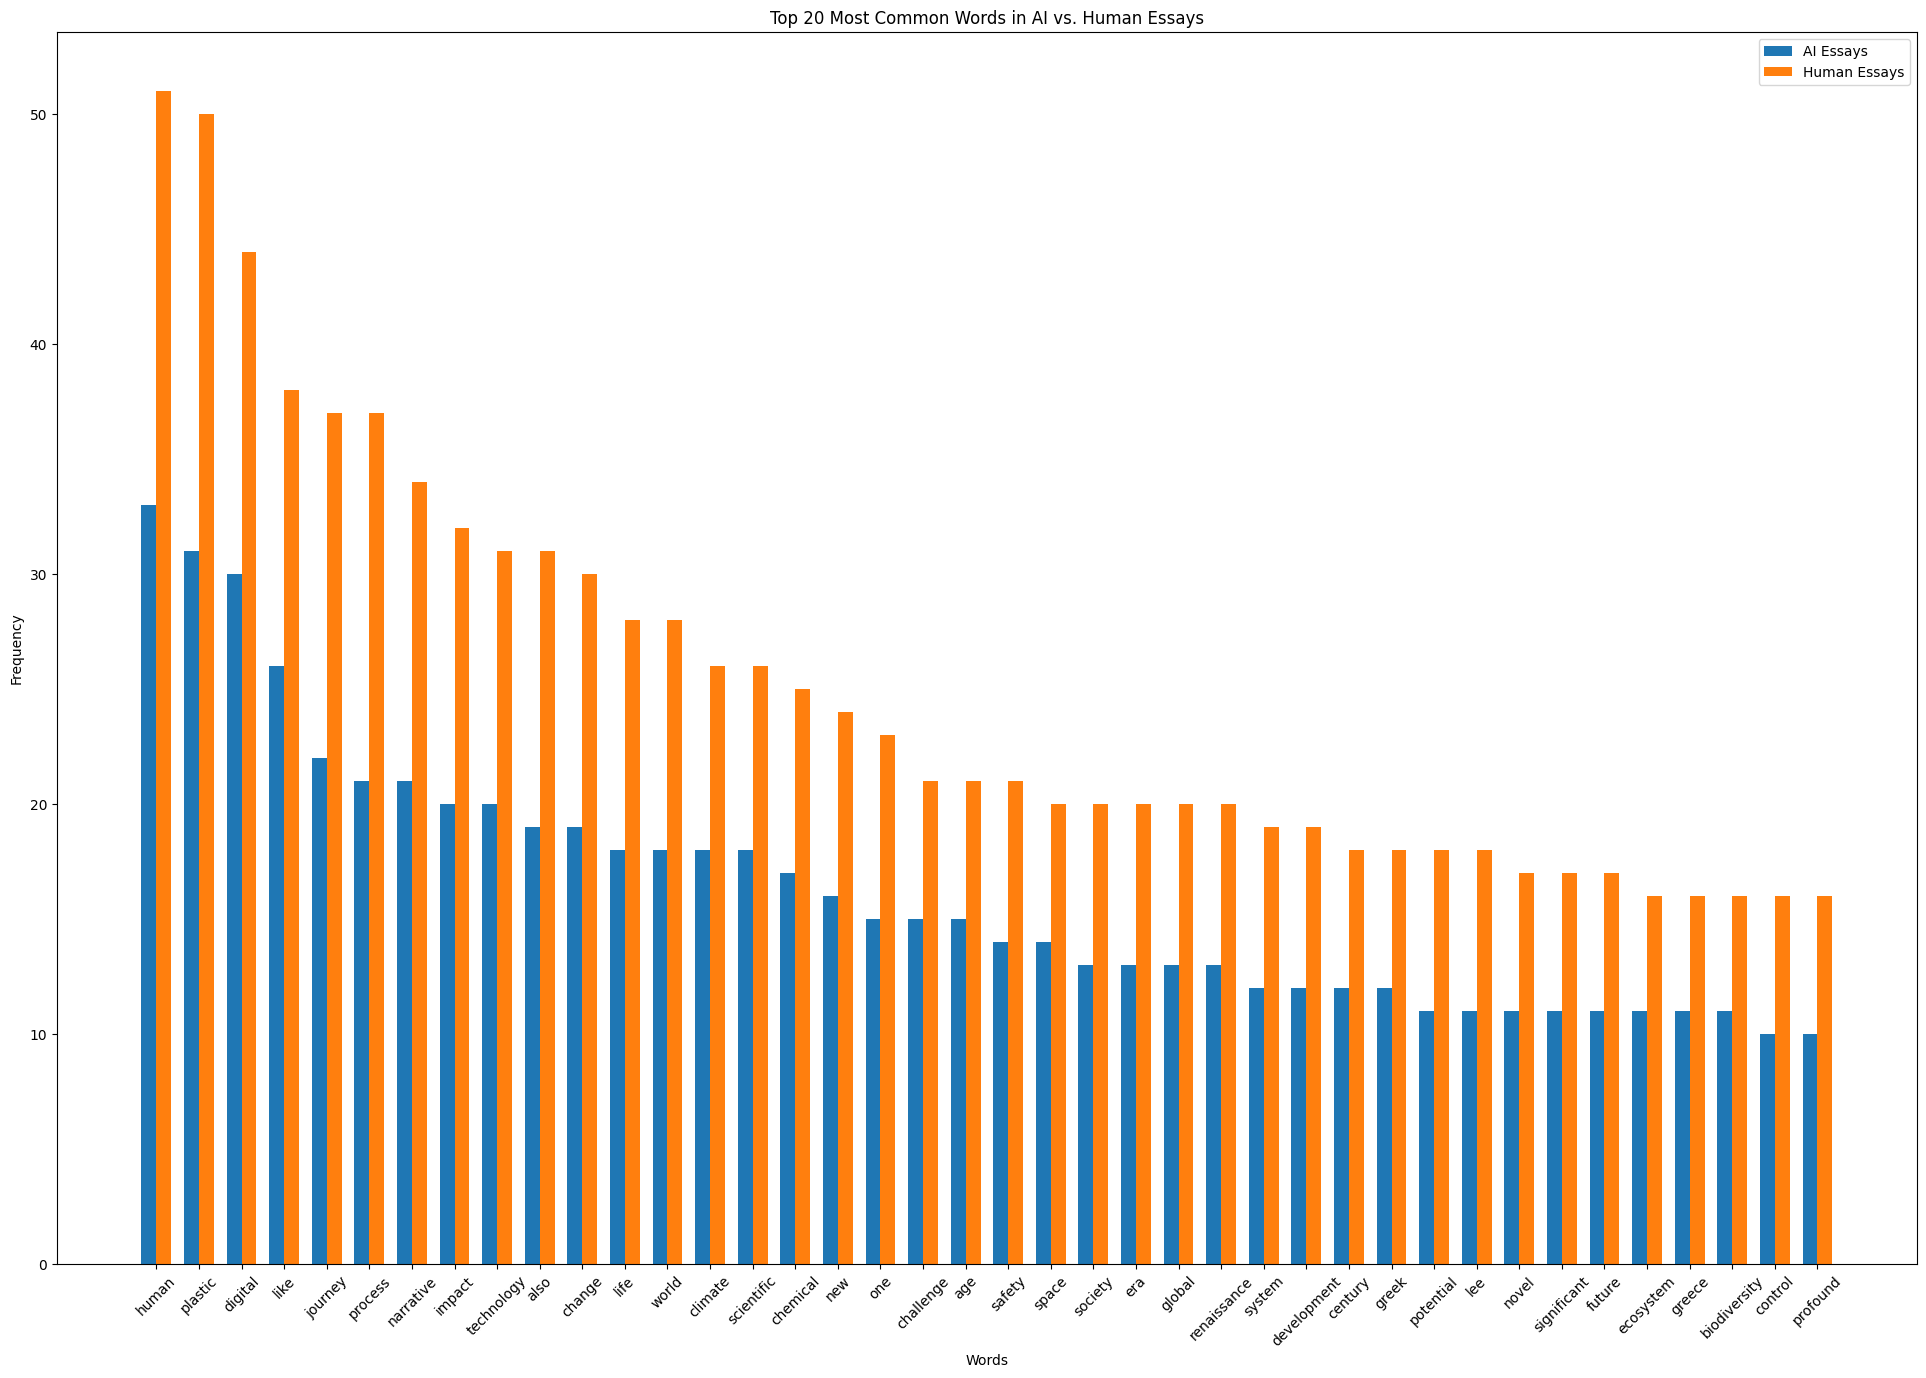

In [17]:
ai_essays = df_all_docs[df_all_docs['label'] == 'AI']['text']
human_essays = df_all_docs[df_all_docs['label'] == 'Human']['text']

ai_words = []
human_words = []

for essay in ai_essays:
    ai_words.extend(preprocess_text(essay))

for essay in human_essays:
    human_words.extend(preprocess_text(essay))

ai_freq_dist = FreqDist(ai_words)
human_freq_dist = FreqDist(human_words)

ai_common_words = ai_freq_dist.most_common(40)
human_common_words = human_freq_dist.most_common(40)

import matplotlib.pyplot as plt
import numpy as np

# Unpack words and frequencies
ai_words, ai_frequencies = zip(*ai_common_words)
human_words, human_frequencies = zip(*human_common_words)

# Create an index for each tick position
ind = np.arange(len(ai_common_words))
width = 0.35  # Width of the bars

fig, ax = plt.subplots(figsize=(24, 16))

# Create the bars for AI and Human essays
ai_bars = ax.bar(ind - width/2, ai_frequencies, width, label='AI Essays')
human_bars = ax.bar(ind + width/2, human_frequencies, width, label='Human Essays')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Top 20 Most Common Words in AI vs. Human Essays')
ax.set_xticks(ind)
ax.set_xticklabels(ai_words)  # Assuming ai_words and human_words are similar; if not, adjust accordingly
ax.legend()

# Rotate the tick labels for better readability
plt.xticks(rotation=45)

plt.show()

## Frequency of Stop/Junk Words

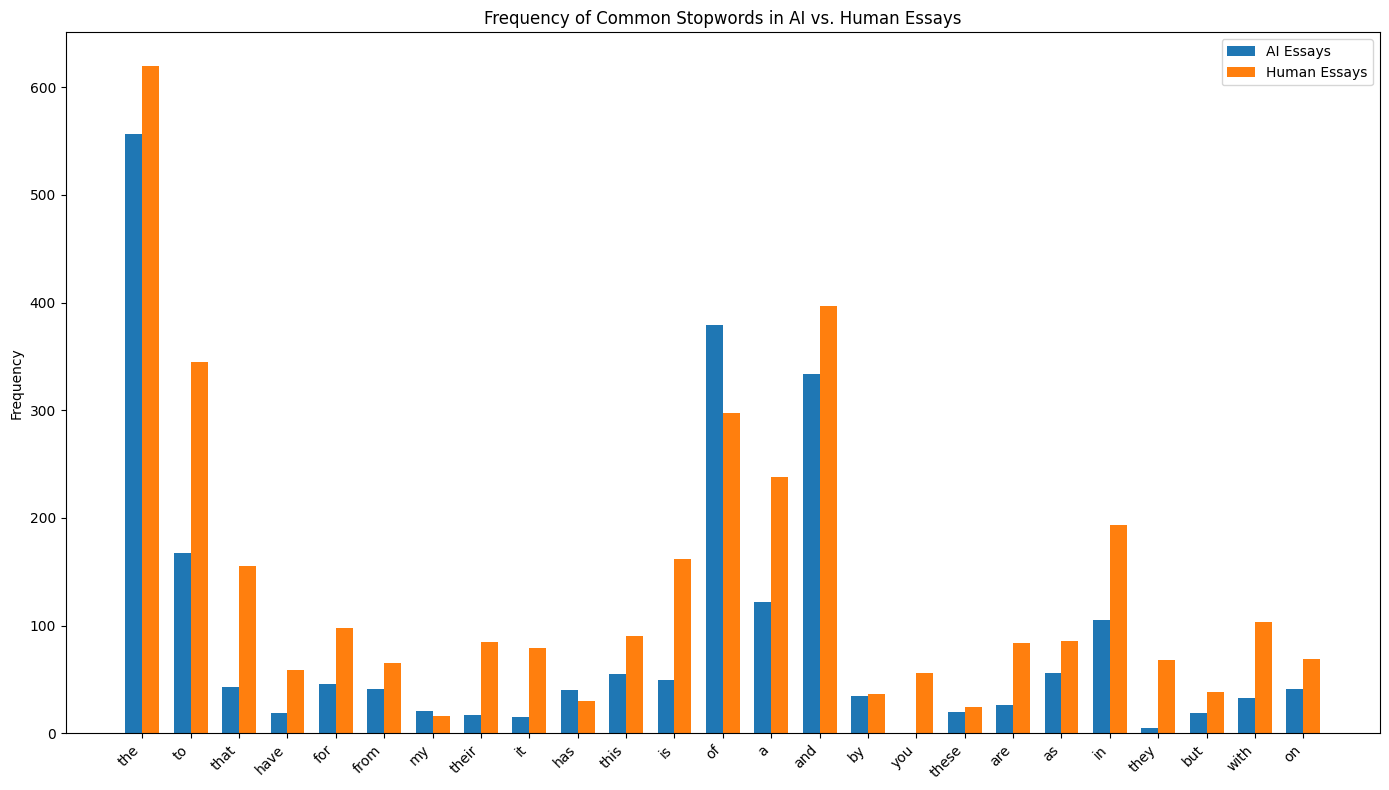

In [18]:
from collections import Counter

def aggregate_stopwords(texts):
    stopwords_counter = Counter()
    for text in texts:
        # Tokenize and convert to lowercase
        tokens = word_tokenize(text.lower())
        # Filter stopwords
        stopwords_counter.update([token for token in tokens if token in stopwords.words('english') and token.isalpha()])
    return stopwords_counter

# Aggregate stopwords for AI and Human essays
ai_stopwords = aggregate_stopwords(df_all_docs[df_all_docs['label'] == 'AI']['text'])
human_stopwords = aggregate_stopwords(df_all_docs[df_all_docs['label'] == 'Human']['text'])

# Identify common stopwords for comparison, you can adjust the number as needed
common_stopwords = set([word for word, count in ai_stopwords.most_common(20)] + [word for word, count in human_stopwords.most_common(20)])
# Prepare data for plotting
plot_data = {word: [ai_stopwords[word], human_stopwords[word]] for word in common_stopwords}

import matplotlib.pyplot as plt
import numpy as np

words = list(plot_data.keys())
ai_freqs = [plot_data[word][0] for word in words]
human_freqs = [plot_data[word][1] for word in words]

x = np.arange(len(words))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, ai_freqs, width, label='AI Essays')
rects2 = ax.bar(x + width/2, human_freqs, width, label='Human Essays')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Common Stopwords in AI vs. Human Essays')
ax.set_xticks(x)
ax.set_xticklabels(words, rotation=45, ha='right')
ax.legend()

fig.tight_layout()

plt.show()


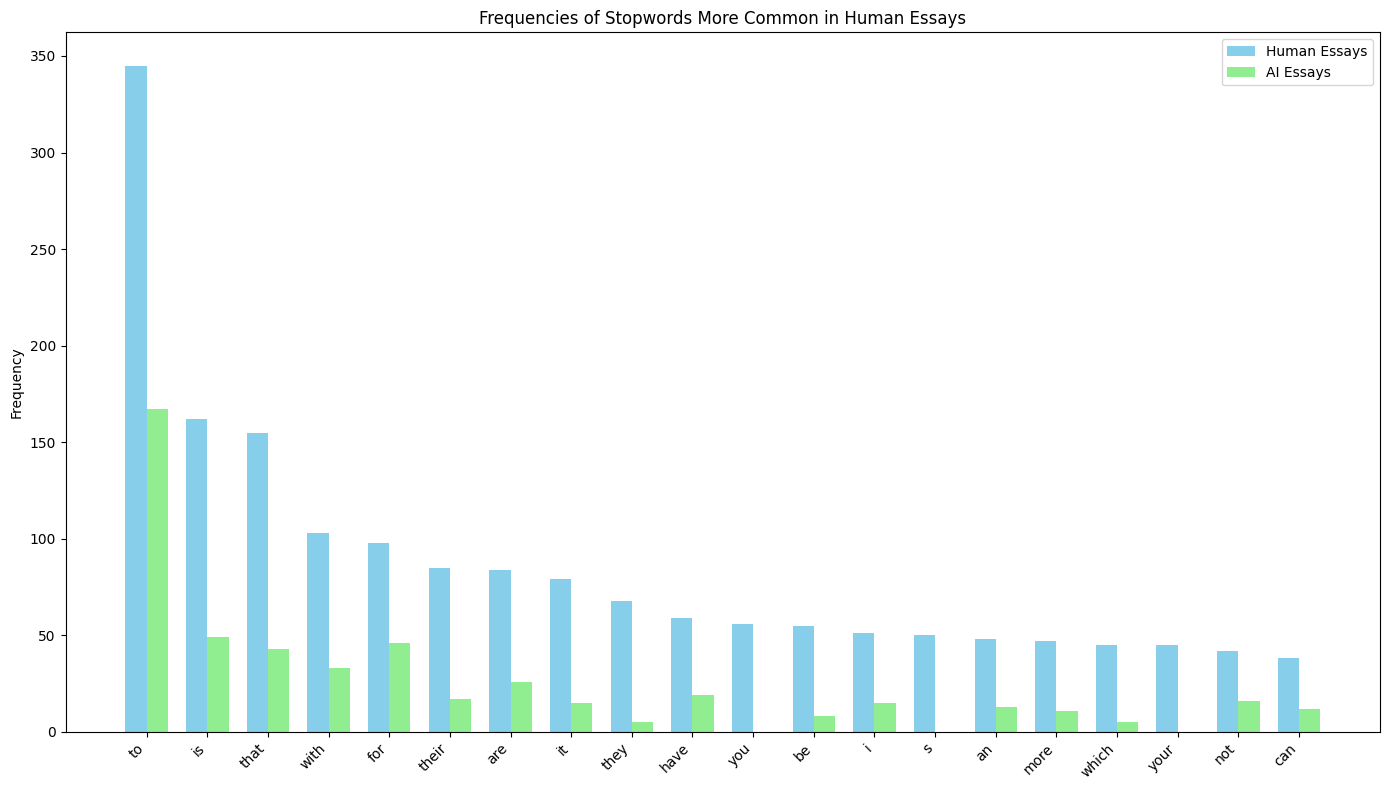

In [22]:
def get_stopword_frequencies(texts):
    stopword_counter = Counter()
    for text in texts:
        # Tokenize and convert to lowercase
        tokens = word_tokenize(text.lower())
        # Filter and count stopwords
        stopword_counter.update([token for token in tokens if token in stopwords.words('english')])
    return stopword_counter
# Aggregate stopword frequencies for AI and Human essays
ai_stopwords_freq = get_stopword_frequencies(df_all_docs[df_all_docs['label'] == 'AI']['text'])
human_stopwords_freq = get_stopword_frequencies(df_all_docs[df_all_docs['label'] == 'Human']['text'])
# Identify stopwords used more frequently by humans
# Here, we're looking for stopwords where human usage is at least double that of AI usage
significant_stopwords = {word: freq for word, freq in human_stopwords_freq.items() if freq > 2 * ai_stopwords_freq.get(word, 0)}

# Sort the significant stopwords by their frequency in human essays, descending
significant_stopwords_sorted = sorted(significant_stopwords.items(), key=lambda x: x[1], reverse=True)[:20]
words, human_freqs = zip(*significant_stopwords_sorted)
ai_freqs = [ai_stopwords_freq[word] for word in words]
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(words))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
human_bars = ax.bar(x - width/2, human_freqs, width, label='Human Essays', color='skyblue')
ai_bars = ax.bar(x + width/2, ai_freqs, width, label='AI Essays', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Frequency')
ax.set_title('Frequencies of Stopwords More Common in Human Essays')
ax.set_xticks(x)
ax.set_xticklabels(words, rotation=45, ha='right')
ax.legend()

fig.tight_layout()

plt.show()